Daniel Kadyrov

CS559 - Homework 3 

Question 4

In [1]:
import pandas as pd

headers = ["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]
data_old = pd.read_csv("HW3_Q4_01_1.csv", names=headers)

In [104]:
import numpy as np 

class kmeansalt:
    def __init__(self, n_clusters, max_iter=100, random_state=123): 
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
    
    def initialize_centroids(self, X): 
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]

        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        
        return distance

    def find_closest_cluster(self, distance):
        
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = np.linalg.norm(X[labels == k] - centroids[k], axis=1)
        
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)

        return self.find_closest_cluster(distance)

    def cluster_variance(self): 
        unique_labels = np.unique(self.labels)
        cluster_size = []
        for label in unique_labels: 
            cluster_size.append(len(X[km.labels==label, 0]))

        return unique_labels, cluster_size    

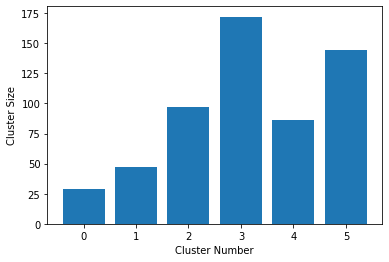

In [106]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(data_old)

km = kmeansalt(n_clusters=6, max_iter=100)
km.fit(X)
cluster, size = km.cluster_variance()

import matplotlib.pyplot as plt

plt.bar(cluster, size)
plt.xlabel("Cluster Number")
plt.ylabel("Cluster Size")
plt.show()

In [108]:
data_old["class"] = km.labels
data_old.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,class
0,288,4,96,56,17,49,20.8,0.340,26,3
1,470,1,144,82,40,0,41.3,0.607,28,5
2,581,6,109,60,27,0,25.0,0.206,27,3
3,620,2,112,86,42,160,38.4,0.246,28,5
4,333,12,106,80,0,0,23.6,0.137,44,2


In [110]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_old[["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]], data_old["class"], test_size=.2)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)


0.7739130434782608

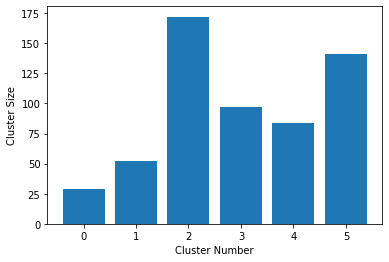

In [111]:
from sklearn.cluster import KMeans

X = StandardScaler().fit_transform(data_old[["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]])
kmeans = KMeans(n_clusters=6).fit(X)
unique_labels = np.unique(kmeans.labels_)
cluster_size = []
for label in unique_labels: 
    cluster_size.append(len(X[kmeans.labels_==label, 0]))

plt.bar(unique_labels, cluster_size)
plt.xlabel("Cluster Number")
plt.ylabel("Cluster Size")
plt.show()

In [112]:
data_old["class"] = kmeans.labels_
data_old.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,class
0,288,4,96,56,17,49,20.8,0.340,26,2
1,470,1,144,82,40,0,41.3,0.607,28,5
2,581,6,109,60,27,0,25.0,0.206,27,2
3,620,2,112,86,42,160,38.4,0.246,28,5
4,333,12,106,80,0,0,23.6,0.137,44,3


In [124]:
x_train, x_test, y_train, y_test = train_test_split(data_old[["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]], data_old["class"], test_size=.2)

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8260869565217391

In [125]:
headers = ["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "class"]
data_new = pd.read_csv("HW3_Q4_1.csv", names=headers)

In [126]:
from sklearn.metrics import accuracy_score

accuracy_score(data_new["class"], data_old["class"])

0.08869565217391304

In [127]:
unique_classes = np.unique(data_new["class"])
unique_classes

array([0, 1])

My model was very poor. 

In [135]:
x_train, x_test, y_train, y_test = train_test_split(data_new[["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]], data_new["class"], test_size=.2)

lr.fit(x_train, y_train)
lr_accuracy = lr.score(x_test, y_test)
lr_accuracy

0.7478260869565218

In [134]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(data_new[["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]], data_new["class"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
data_test = pd.read_csv("HW3_Q4_2.csv", skiprows=1, names=headers)
data_test["f0"] = data_test["f0"].astype(float)
data_test.head() 

,f0,f1,f2,f3,f4,f5,f6,f7,f8,class
0,5.0,5,116,74,0,0,25.6,0.201,30,0
1,11.0,10,168,74,0,0,38.0,0.537,34,1
2,14.0,5,166,72,19,175,25.8,0.587,51,1
3,21.0,8,99,84,0,0,35.4,0.388,50,0
4,24.0,11,143,94,33,146,36.6,0.254,51,1


In [138]:
pred = rfc.predict(data_test[["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]])

rfc_accuracy = accuracy_score(data_test["class"], pred)

rfc_accuracy

0.7552083333333334

In [143]:
"Logistic Regression: {} \n Random Forest: {}".format(lr_accuracy, rfc_accuracy)

'Logistic Regression: 0.7478260869565218 \n Random Forest: 0.7552083333333334'

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(data_new[["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]], data_new["class"])

pred = gbc.predict(data_test[["f0", "f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8"]])

gbc_accuracy = accuracy_score(data_test["class"], pred)

gbc_accuracy

0.7760416666666666